### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [4]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [5]:
female_swim = female_data[female_data['Sport'] == 'Football']

In [6]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 5465    Football
5466    Football
5467    Football
5468    Football
5469    Football
          ...   
6348    Football
6349    Football
6350    Football
6351    Football
6352    Football
Name: Sport, Length: 888, dtype: object>

In [7]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 5465    NA
5466    NA
5467    NA
5468    NA
5469    NA
        ..
6348    NA
6349    NA
6350    NA
6351    NA
6352    NA
Name: Medal, Length: 888, dtype: object>

In [8]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 5465 to 6352
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      888 non-null    int64  
 1   Unnamed: 0_x    888 non-null    int64  
 2   ID              888 non-null    int64  
 3   Name            888 non-null    object 
 4   Sex             888 non-null    object 
 5   Age             888 non-null    float64
 6   Height          888 non-null    float64
 7   Weight          888 non-null    float64
 8   NOC             888 non-null    object 
 9   Games           888 non-null    object 
 10  Year            888 non-null    int64  
 11  Season          888 non-null    object 
 12  City            888 non-null    object 
 13  Sport           888 non-null    object 
 14  Event           888 non-null    object 
 15  Medal           888 non-null    object 
 16  Team            888 non-null    object 
 17  Unnamed: 0_y    888 non-null   

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (666, 1) (666, 6)
Test Set  : (222, 1) (222, 6)


In [11]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [12]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
6242,34.0,73.0,177.0,1.530000e+12,36286425.0,42164.528470,Bronze
5665,18.0,55.0,164.0,1.530000e+12,36286425.0,42164.528470,Bronze
6068,21.0,60.0,160.0,3.620000e+11,40382389.0,8964.303722,NA
6278,21.0,54.0,159.0,3.700000e+11,46881475.0,7892.243151,NA
6077,25.0,60.0,172.0,1.800000e+12,207652865.0,8668.312860,NA
...,...,...,...,...,...,...,...
5514,20.0,58.0,170.0,3.750000e+12,82110097.0,45670.388138,Bronze
5652,22.0,56.0,160.0,1.030000e+13,282162411.0,36503.799225,Silver
5768,32.0,52.0,162.0,5.040000e+12,128063000.0,39355.629651,NA
5938,27.0,56.0,155.0,6.690000e+11,184738458.0,3621.335846,Silver


In [13]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        632
Bronze     86
Gold       86
Silver     84
Name: Medal, dtype: int64


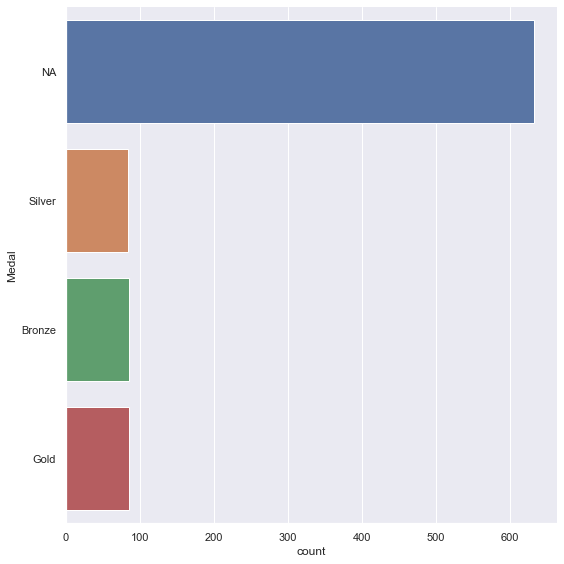

In [14]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [15]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(666, 6) (666, 1)


In [16]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1872, 6) (1872, 1)


In [17]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,34.000000,73.000000,177.000000,1.530000e+12,36286425.0,42164.528470,Bronze
1,18.000000,55.000000,164.000000,1.530000e+12,36286425.0,42164.528470,Bronze
2,21.000000,60.000000,160.000000,3.620000e+11,40382389.0,8964.303722,NA
3,21.000000,54.000000,159.000000,3.700000e+11,46881475.0,7892.243151,NA
4,25.000000,60.000000,172.000000,1.800000e+12,207652865.0,8668.312860,NA
...,...,...,...,...,...,...,...
1867,26.408596,61.591404,167.652340,6.200000e+12,127629000.0,48578.301170,Silver
1868,27.888350,55.555825,159.885925,6.690000e+11,184738458.0,3621.335846,Silver
1869,26.495435,56.000000,163.746196,1.030000e+13,282162411.0,36503.799225,Silver
1870,20.135740,65.592779,170.864260,6.690000e+11,184738458.0,3621.335846,Silver


In [18]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
6002,19.0,65.0,164.0,2.910444e+10,2.108238e+07,1380.509848
6093,27.0,57.0,172.0,4.600000e+12,1.324655e+09,3472.602300
6001,24.0,67.0,177.0,1.850000e+11,4.692700e+06,39422.933492
6305,23.0,62.0,165.0,4.630000e+11,4.768212e+06,97101.387271
5546,22.0,56.0,172.0,1.850000e+11,4.692700e+06,39422.933492
...,...,...,...,...,...,...
5710,17.0,62.0,167.0,1.330000e+11,4.259800e+06,31222.123104
5844,25.0,68.0,179.0,4.638601e+10,1.223520e+08,379.119326
6036,22.0,53.0,164.0,1.330000e+07,2.431000e+07,0.547100
5618,28.0,61.0,162.0,2.950000e+11,5.590886e+07,5276.444084


Number of Medal Types : 4
Bronze    468
Gold      468
NA        468
Silver    468
Name: Medal, dtype: int64


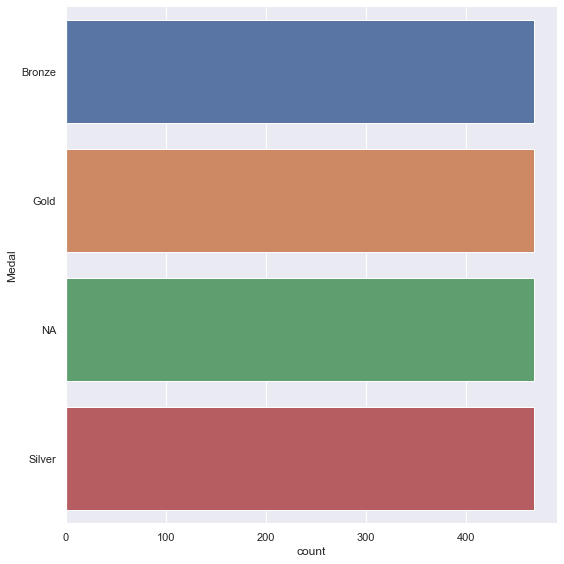

In [19]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (1404, 1) (1404, 6)
Test Set  : (468, 1) (468, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9878917378917379

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9636752136752137



<AxesSubplot:>

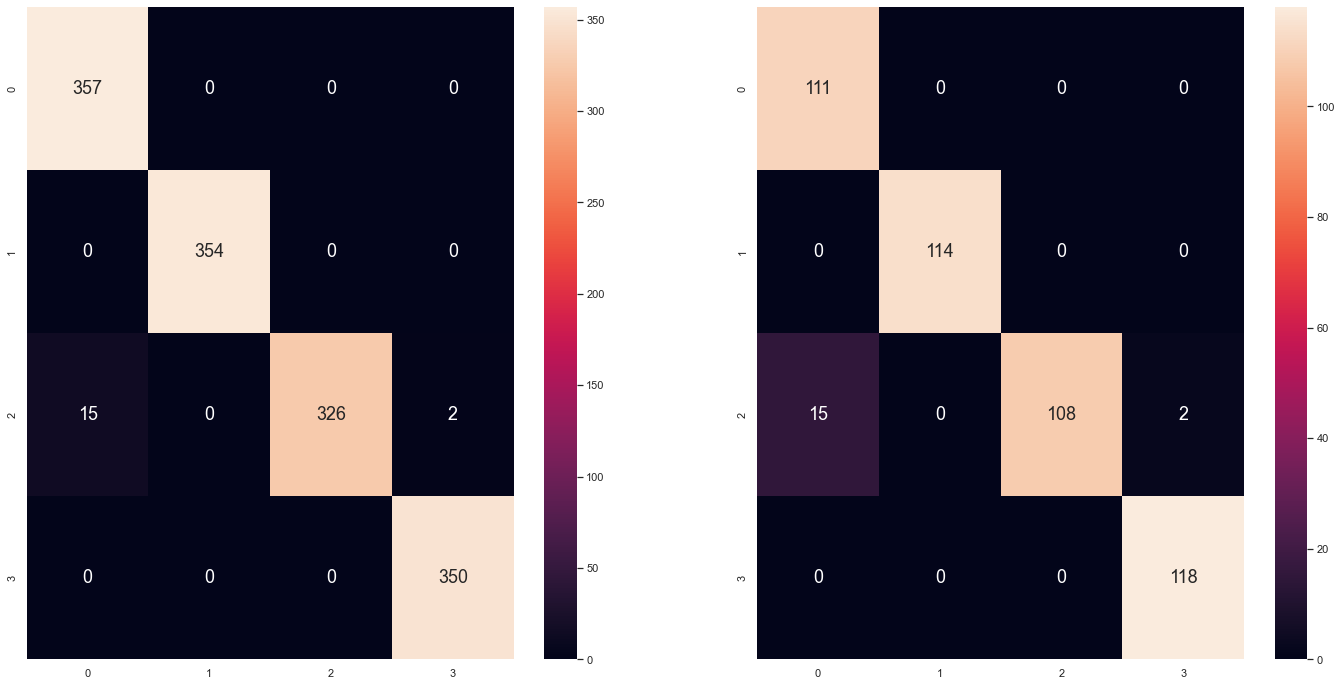

In [20]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 6)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

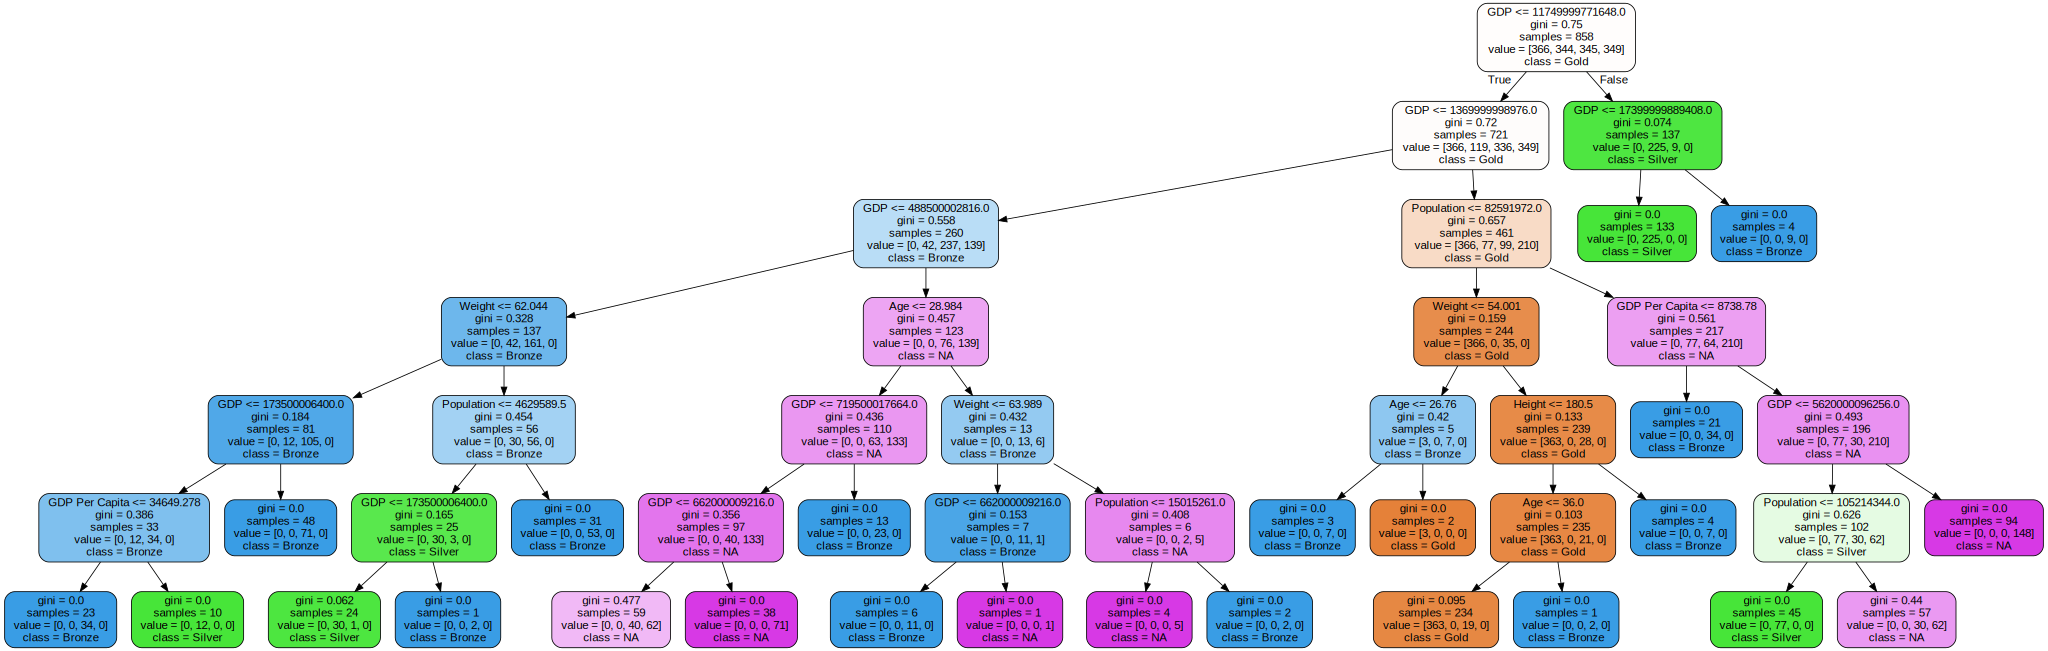

In [21]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [22]:
graph.render("Tree_female_FOOTBALL")

'Tree_female_FOOTBALL.pdf'

### Predictions

In [23]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.9414414414414415


<AxesSubplot:>

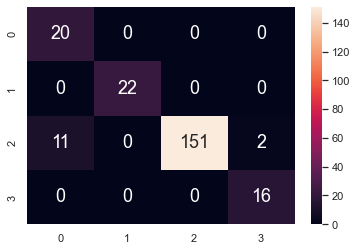

In [24]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})